<a href="https://colab.research.google.com/github/gabriels3t/Python-Scikit-Learn-regressao-classificacao-e-clustering/blob/main/classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importação 


In [55]:
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import  train_test_split 
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# Visualização

In [2]:
celular = pd.read_csv('data/Celular.csv')
celular.head()

,salario,economias,idade,dividas,plano
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


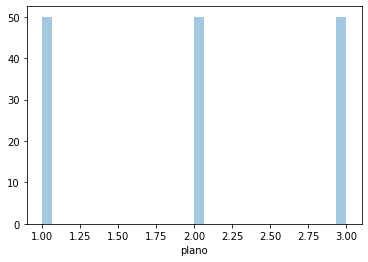

In [7]:
sns.distplot(celular.plano,bins = 30, kde=False)

# Árvore de decisão

In [11]:
x= celular.iloc[:,:-1].values
y = celular.iloc[:,4].values

**Treinando  **

In [14]:
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y, test_size = 0.3)

In [17]:
classificador_arvore = tree.DecisionTreeClassifier()

In [18]:
classificador_arvore.fit(x_treino, y_treino) # Fazendo ajustes

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Fazendo um grafico de arvore**

In [21]:
dot_data = tree.export_graphviz(classificador_arvore,filled=True, out_file=None)


In [22]:
graph = graphviz.Source(dot_data)

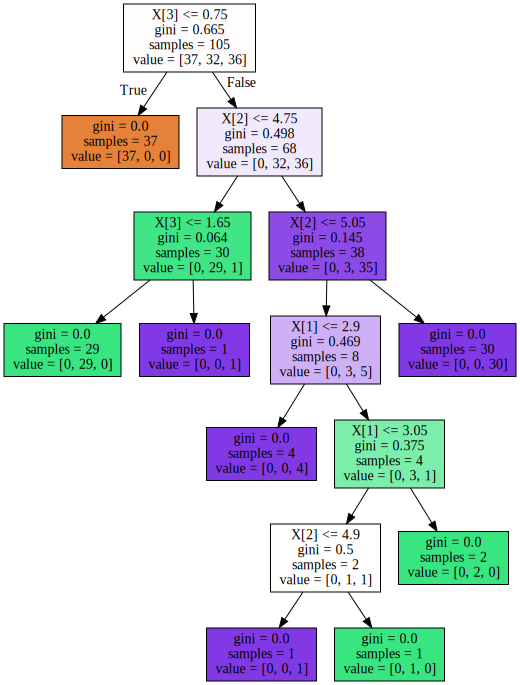

In [24]:
graph 

**Fazendo predições**

In [25]:
plano_previsto =  classificador_arvore.predict(x_teste)

In [26]:
plano_previsto

array([1, 3, 3, 2, 3, 2, 3, 2, 3, 1, 1, 2, 3, 3, 2, 1, 3, 3, 1, 1, 3, 3,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 3, 2, 2, 3, 2, 3, 3, 1, 3, 3,
       1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


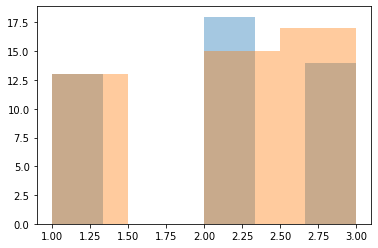

In [30]:
sns.distplot(y_teste,bins=6,kde=False)
sns.distplot(plano_previsto,bins=4, kde = False)

** Vendo a porcentagem de acerto com accuracy**

In [39]:
porcentagem_de_acerto = accuracy_score(y_teste,plano_previsto)*100
print(f'A porcentagem de acerto foi de {porcentagem_de_acerto.round(2)} %')

A porcentagem de acerto foi de 93.33 %


# Classificação com K vizinhos mais proximos

In [42]:
  classificador_vizinho = KNeighborsClassifier(5) # considerando 5 vizinhos usando 5 pq vai ser utilizado 3 classes (dividas, salarios e plano) 
# assim nao tem igual e nem múltiplo do número de classes.

In [43]:
classificador_vizinho.fit(x_treino,y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
plano_previsto_v = classificador_vizinho.predict(x_teste)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


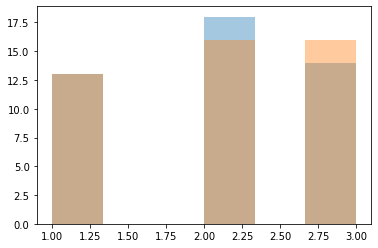

In [46]:
sns.distplot(y_teste,bins=6, kde = False)
sns.distplot(plano_previsto_v,bins=6, kde = False)

In [48]:
porcentagem_de_acerto = accuracy_score(y_teste,plano_previsto_v)*100
print(f'A porcentagem de acerto foi de {porcentagem_de_acerto.round(2)} %')

A porcentagem de acerto foi de 95.56 %


# Sobreajuste e divisão em treino e teste

In [49]:
plano_previsto_v2 = classificador_vizinho.predict(x_treino)

In [52]:
porcentagem_de_acerto = accuracy_score(y_treino,plano_previsto_v2)*100
print(f'A porcentagem de acerto foi de {porcentagem_de_acerto.round(2)} %') 
# Geralmente em dados de treino o acerto seja maior

A porcentagem de acerto foi de 99.05 %


**Estratificação Cruzada**

In [54]:
skfold = RepeatedStratifiedKFold(n_splits= 10,n_repeats=10,random_state=0) 
# n_splits= numero de divisoes  n_repeats = numero de repetição

In [56]:
params = {'n_neighbors':[5]}

In [57]:
gs = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,cv =skfold, verbose=1,scoring='accuracy',return_train_score=True)

In [58]:
gs.fit(x,y)

Fitting 100 folds for each of 1 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=0),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None, param_grid={'n_neighbors': [5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [59]:

gs.cv_results_['mean_test_score']

array([0.964])

In [61]:
porcentagem_de_acerto = gs.cv_results_['mean_test_score']*100
print(f'A porcentagem de acerto foi de {porcentagem_de_acerto[0].round(2)} %') 

A porcentagem de acerto foi de 96.4 %
